In [29]:
%load_ext autoreload
%autoreload 2

import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from src.variablesName import VariablesName
import src.pathconfig as pathcfg
from src.ploting import plot_learning_curve

vNames = VariablesName()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np

# set seed for reproducibility
np.random.seed(0) 

In [3]:
folderpath = pathcfg.folderpath
filepath = f"{folderpath}/2017-2018_NSCH_without_variables.csv.gz"

In [4]:
df = pd.read_csv(filepath, index_col='HHID', compression='gzip')
have_autism = df[['K2Q35B']].fillna(2)
df = df[[col for col in df.columns.values if col != 'K2Q35B']]

In [96]:
y = have_autism.values
X = df.fillna(999).values
model_columns = df.columns

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
# All trained models
clf_models = {}

## Models

**Feature selection**: Random Forest Classifier

**Classification algorithm**: Support Vector Machine

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

clf = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestClassifier(max_depth=3, random_state=0),
                                        threshold="0.667*median", max_features=25)),
  ('classification', svm.SVC(random_state=0))
])
clf.fit(X_train, y_train.ravel())
clf_models[('RandomForestClassifier', 'SVC')] = clf

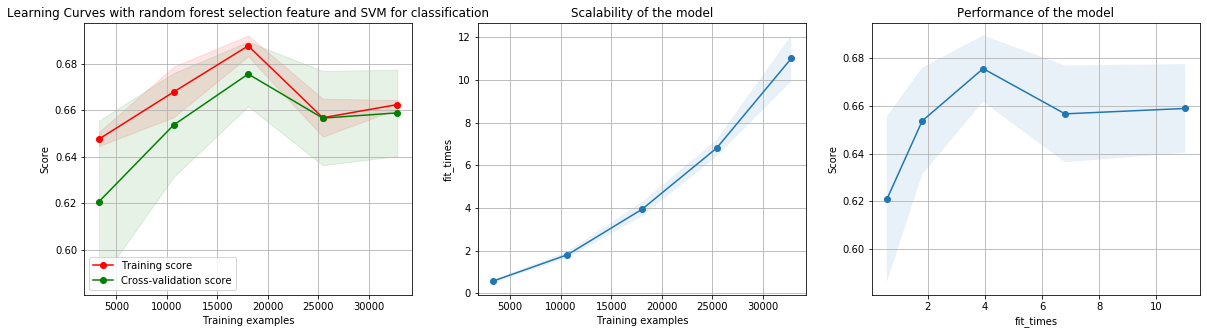

              precision    recall  f1-score   support

         1.0       0.65      0.24      0.35       404
         2.0       0.98      1.00      0.99     15235

    accuracy                           0.98     15639
   macro avg       0.82      0.62      0.67     15639
weighted avg       0.97      0.98      0.97     15639



In [112]:
from sklearn.model_selection import StratifiedKFold

title = f"Learning Curves with random forest selection feature and SVM for classification"

cv = StratifiedKFold(n_splits=10)
estimator = clf_models[('RandomForestClassifier', 'SVC')]

from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train, y_train.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

print(classification_report(y_test, estimator.predict(X_test)))

In [113]:
columns_of_model = [y for x, y in zip(clf_models[('RandomForestClassifier', 'SVC')]['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

K2Q36A   Developmental Delay
ERRANDALONE   Difficulty Doing Errands Alone
K6Q15   Special Education Plan
ANYOTHER   Any Other Condition
DiffMem_1718   Children who have serious difficulty concentrating, remembering, or making decisions because of a physical, mental, or emotional condition, age 6-17 years
K2Q30A   Learning Disability
K4Q36   Received Special Services
CSHCNComplex_1718   Complexity of health care needs
K2Q34A   Behavior Problems
K4Q38   Received Special Services - Currently
K2Q36B   Developmental Delay Currently
K2Q37B   Speech Disorder Currently
SESCURRSVC   Special Education Plan - Currently
K2Q34B   Behavior Problems Currently
ANYOTHER_CURR   Any Other Condition Currently
SESPLANYR   Special Education Plan - Age in Years
K2Q34C   Behavior Problems Severity Description
K2Q36C   Developmental Delay Severity Description
DiffCare_1718   Parent felt child is much harder to care for than most children during the past month
K2Q30C   Learning Disability Severity Description
K

**Feature selection**: Decision Tree Classifier

**Classification algorithm**: Support Vector Machine

In [116]:
from sklearn.tree import DecisionTreeClassifier


clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(),
                                        threshold="0.667*median", max_features=25)),
  ('classification', svm.SVC(random_state=0))
])
clf.fit(X_train, y_train.ravel())

clf_models[('DecisionTreeClassifier', 'SVC')] = clf
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       404
         2.0       0.97      1.00      0.99     15235

    accuracy                           0.97     15639
   macro avg       0.49      0.50      0.49     15639
weighted avg       0.95      0.97      0.96     15639



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


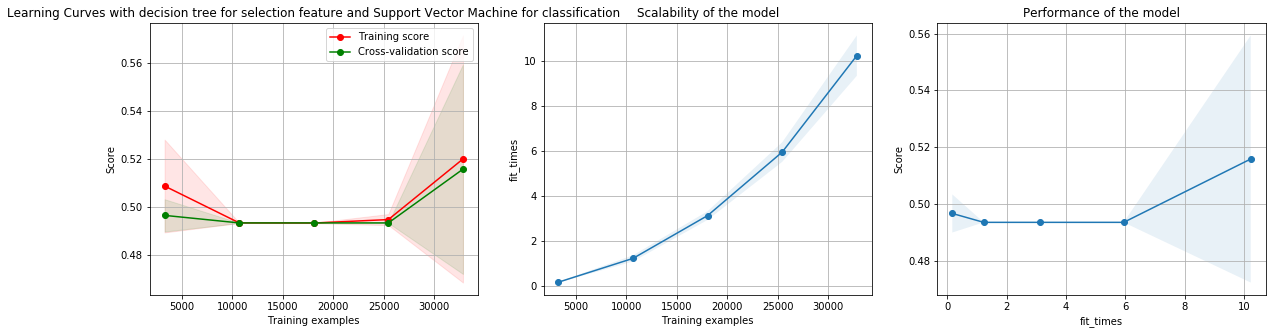

In [117]:
title = f"Learning Curves with decision tree for selection feature and Support Vector Machine for classification"

cv = StratifiedKFold(n_splits=10)
estimator = clf_models[('DecisionTreeClassifier', 'SVC')]

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train, y_train.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

**Feature selection**: Decision Tree Classifier

**Classification algorithm**: Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(), threshold=0.005)),
  ('classification', LogisticRegression())
])
clf.fit(X_train, y_train)

clf_models[('DecisionTreeClassifier', 'LogisticRegression')] = clf
print(classification_report(y_test, clf.predict(X_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.61      0.28      0.39       404
         2.0       0.98      1.00      0.99     15235

    accuracy                           0.98     15639
   macro avg       0.79      0.64      0.69     15639
weighted avg       0.97      0.98      0.97     15639



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


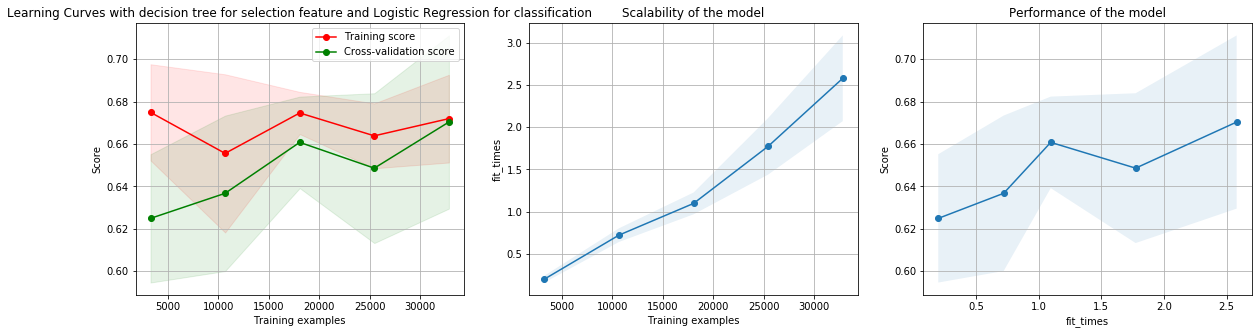

In [119]:
title = f"Learning Curves with decision tree for selection feature and Logistic Regression for classification"

cv = StratifiedKFold(n_splits=10)
estimator = clf_models[('DecisionTreeClassifier', 'LogisticRegression')]

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train, y_train.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

**Feature selection**: Decision Tree Classifier

**Classification algorithm**: Logistic Regression

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(), threshold=0.005, max_features=25)),
  ('classification', LogisticRegression())
])
clf.fit(X_train, y_train.ravel())

clf_models[('DecisionTreeClassifier', 'LogisticRegression')] = clf
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.47      0.35      0.40       404
         2.0       0.98      0.99      0.99     15235

    accuracy                           0.97     15639
   macro avg       0.73      0.67      0.69     15639
weighted avg       0.97      0.97      0.97     15639



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


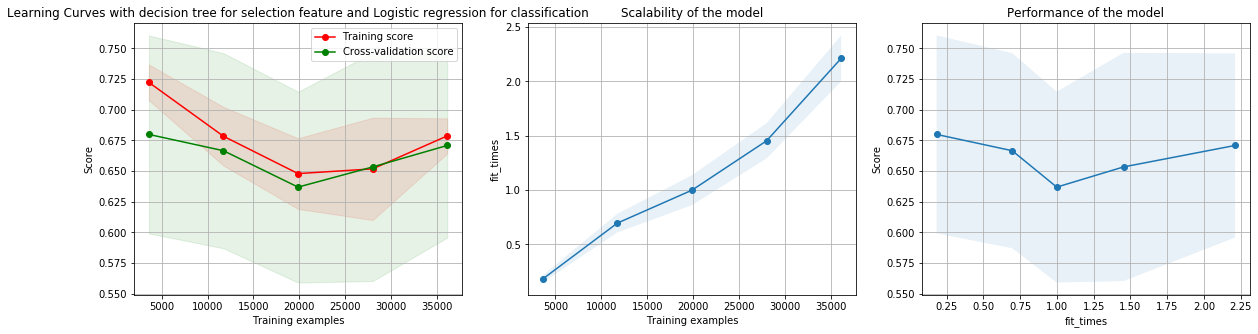

In [92]:
title = f"Learning Curves with decision tree for selection feature and Logistic regression for classification"

cv = StratifiedKFold(n_splits=100)
estimator = clf_models[('DecisionTreeClassifier', 'LogisticRegression')]

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train, y_train.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

In [97]:
columns_of_model = [y for x, y in zip(clf_models[('DecisionTreeClassifier', 'LogisticRegression')]['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

ANYOTHER   Any Other Condition
CSHCNComplex_1718   Complexity of health care needs
MENBEVCOV   Health Insurance - Cover Mental Behavioral Needs
K4Q38   Received Special Services - Currently
ARRANGEHC   Hours Spent Arranging Health Medical Care
K5Q21   Arrange Or Coordinate Care Extra Help
TOTNONSHCN   Count of Children without Special Health Care Needs in Household
partic_1718   Number of organized activities child participates in after school (6-17 years)
EMOSUPADV   Emotional Support - Health Condition Support Group
SESPLANYR   Special Education Plan - Age in Years
K4Q26   Specialist Visit - Problem
K2Q33C   Anxiety Severity Description
K5Q11   Need a Referral - Problem
K8Q32   How Often Have You Felt - Child Really Bothers You
K2Q01   General Health
C4Q04   Frustrated In Efforts to Get Service
K8Q21   Share Ideas or Talk About Things That Matter
K7Q85_R   Stays Calm and In Control When Challenged
cntdiff   Number of functional difficulties reported from list of 12 different difficul

**Classification algorithm**: Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced')

randomForestClassifier.fit(X_train, y_train.ravel())

clf_models[('', 'RandomForestClassifier')] = randomForestClassifier

print(classification_report(y_test, estimator.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.65      0.25      0.36       404
         2.0       0.98      1.00      0.99     15235

    accuracy                           0.98     15639
   macro avg       0.81      0.62      0.67     15639
weighted avg       0.97      0.98      0.97     15639



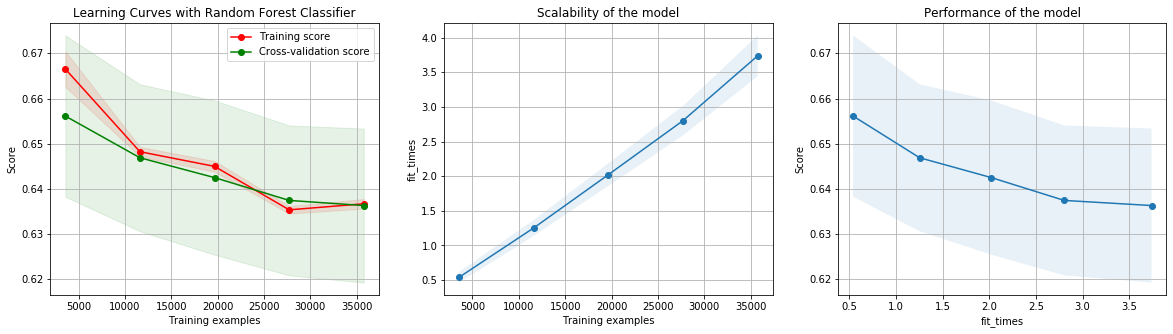

In [89]:
title = f"Learning Curves with Random Forest Classifier"

cv = StratifiedKFold(n_splits=50)
estimator = clf_models[('', 'RandomForestClassifier')]

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train, y_train.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

#### Oversampling

In [75]:
from sklearn.utils import resample

X_train_have_asd = X_train[(y_train==1).ravel()]
y_train_have_asd = (y_train==1).ravel()

n_samples = X_train.shape[0] - X_train_have_asd.shape[0]
X_train_asd_res, y_train_asd_res = resample(X_train, y_train, n_samples=n_samples)

X_train_res = np.concatenate((X_train, X_train_asd_res), axis=0)
y_train_res = np.concatenate((y_train, y_train_asd_res), axis=0)

**Classification algorithm**: Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier(max_depth=3, random_state=0)
randomForestClassifier.fit(X_train_res, y_train_res.ravel())

clf_models[('Oversampling', 'RandomForestClassifier')] = randomForestClassifier

print(classification_report(y_test, randomForestClassifier.predict(X_test)))


              precision    recall  f1-score   support

         1.0       0.89      0.02      0.04       404
         2.0       0.97      1.00      0.99     15235

    accuracy                           0.97     15639
   macro avg       0.93      0.51      0.51     15639
weighted avg       0.97      0.97      0.96     15639



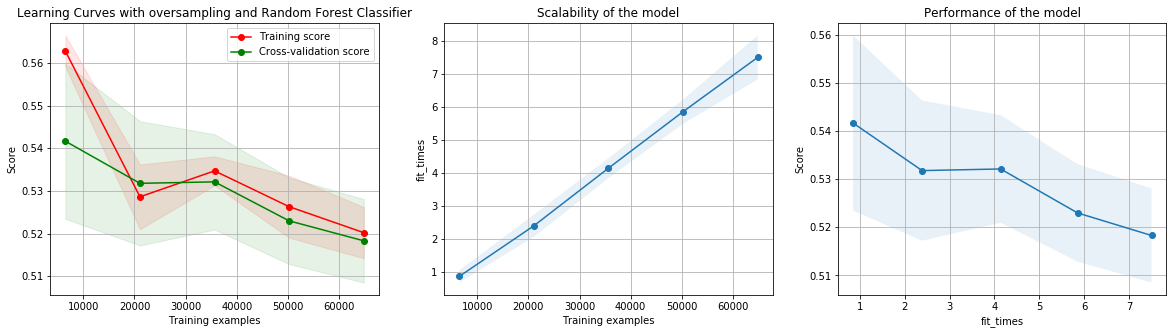

In [83]:
title = f"Learning Curves with oversampling and Random Forest Classifier"

cv = StratifiedKFold(n_splits=10)
estimator = clf_models[('Oversampling', 'RandomForestClassifier')]

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train_res, y_train_res.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

**Feature selection**: Random Forest Classifier

**Classification algorithm**: Support Vector Machine Classifier

In [114]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestClassifier(max_depth=3, random_state=0),
                                        threshold="0.667*median", max_features=25)),
  ('classification', svm.SVC(random_state=0))
])

clf.fit(X_train_res, y_train_res.ravel())
clf_models[('Oversampling-RandomForestClassifier', 'SVC')] = clf

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.65      0.25      0.36       404
         2.0       0.98      1.00      0.99     15235

    accuracy                           0.98     15639
   macro avg       0.81      0.62      0.67     15639
weighted avg       0.97      0.98      0.97     15639



/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


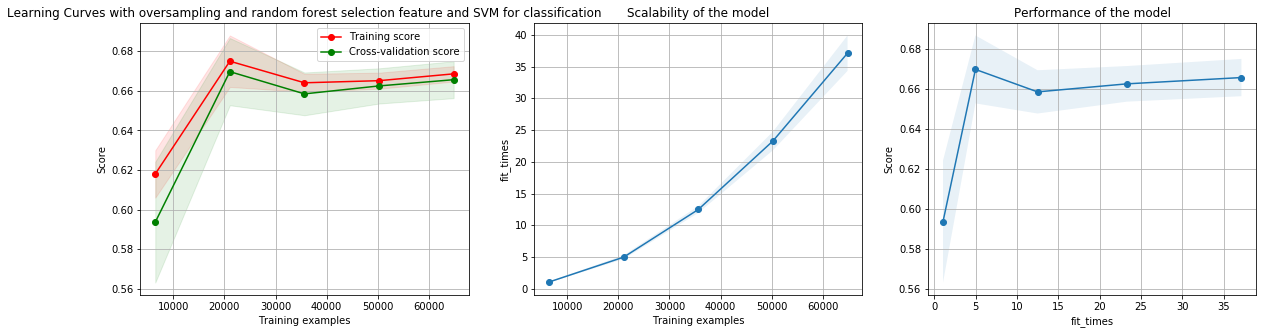

In [87]:
from sklearn.model_selection import StratifiedKFold

title = f"Learning Curves with oversampling and random forest selection feature and SVM for classification"

cv = StratifiedKFold(n_splits=10)
estimator = clf_models[('Oversampling-RandomForestClassifier', 'SVC')]

from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train_res, y_train_res.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

In [100]:
columns_of_model = [y for x, y in zip(clf_models[('Oversampling-RandomForestClassifier', 'SVC')]['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

K2Q36A   Developmental Delay
ERRANDALONE   Difficulty Doing Errands Alone
K6Q15   Special Education Plan
ANYOTHER   Any Other Condition
DiffMem_1718   Children who have serious difficulty concentrating, remembering, or making decisions because of a physical, mental, or emotional condition, age 6-17 years
K2Q30A   Learning Disability
K4Q36   Received Special Services
DiffDress_1718   Children who have difficulty dressing or bathing, age 6-17 years
CSHCNComplex_1718   Complexity of health care needs
K4Q38   Received Special Services - Currently
K2Q36B   Developmental Delay Currently
K2Q37B   Speech Disorder Currently
SESCURRSVC   Special Education Plan - Currently
K2Q34B   Behavior Problems Currently
ANYOTHER_CURR   Any Other Condition Currently
SESPLANYR   Special Education Plan - Age in Years
K2Q34C   Behavior Problems Severity Description
K2Q36C   Developmental Delay Severity Description
DiffCare_1718   Parent felt child is much harder to care for than most children during the past mo

**Feature selection**: Decision Tree Classifier

**Classification algorithm**: Logistic Regression

In [93]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(DecisionTreeClassifier(), threshold=0.005, max_features=25)),
  ('classification', LogisticRegression())
])
clf.fit(X_train_res, y_train_res.ravel())

clf_models[('Oversampling-DecisionTreeClassifier', 'LogisticRegression')] = clf

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.38      0.28      0.32       404
         2.0       0.98      0.99      0.98     15235

    accuracy                           0.97     15639
   macro avg       0.68      0.63      0.65     15639
weighted avg       0.97      0.97      0.97     15639



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


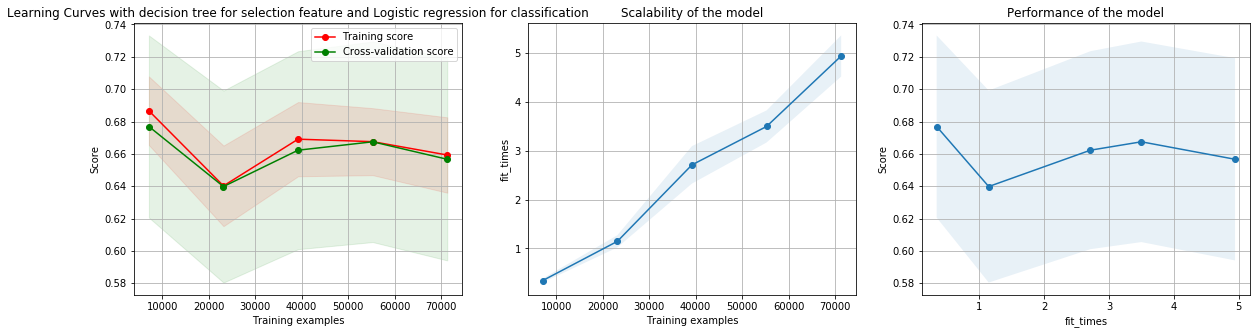

In [94]:
title = f"Learning Curves with decision tree for selection feature and Logistic regression for classification"

cv = StratifiedKFold(n_splits=100)
estimator = clf_models[('Oversampling-DecisionTreeClassifier', 'LogisticRegression')]

scorer = make_scorer(f1_score, average='macro')

plot_learning_curve(estimator, title, X_train_res, y_train_res.ravel(), cv=cv, n_jobs=4, scoring=scorer)

plt.show()

In [99]:
columns_of_model = [y for x, y in zip(clf_models[('Oversampling-DecisionTreeClassifier', 'LogisticRegression')]['feature_selection'].get_support(), model_columns) if x]
for col in columns_of_model:
    print(f"{col}   {vNames.descriptionOfColumn(col)}")

ANYOTHER   Any Other Condition
MENBEVCOV   Health Insurance - Cover Mental Behavioral Needs
K4Q38   Received Special Services - Currently
ARRANGEHC   Hours Spent Arranging Health Medical Care
ATHOMEHC   Hours Spent Providing Home Health Care
TOTNONSHCN   Count of Children without Special Health Care Needs in Household
partic_1718   Number of organized activities child participates in after school (6-17 years)
SESPLANYR   Special Education Plan - Age in Years
STOPWORK   Past 12 Months - Stopped Working because of Health Status
K4Q26   Specialist Visit - Problem
K5Q11   Need a Referral - Problem
K8Q32   How Often Have You Felt - Child Really Bothers You
K2Q01   General Health
K7Q83_R   Does All Required Homework
C4Q04   Frustrated In Efforts to Get Service
K8Q21   Share Ideas or Talk About Things That Matter
K7Q04R_R   Times School Contacted Household About Problems
K7Q85_R   Stays Calm and In Control When Challenged
cntdiff   Number of functional difficulties reported from list of 12 di